In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

# Information abouth Wine:

- **Malic_Acid =** Malic Acid is one of the main acids found in the acidity of grapes. Its concentration decreases the more a grape ripens. Malic Acid provides a strong link to wines tasting ‘flat’ if there is not enough. If there is too much the wine will taste ‘sour’. It is vital that the levels of malic acid are monitored during the fermentation process.

- **Ash =** Ash determination is an obligatory analysis for certified wines to be placed on the market. It is defined as all the inorganic matter remaining after igniting the residue left from the evaporation of must or wine

- **Ash_Alcanity =** The alkalinity of the ash is defined as the sum of cations, other than the ammonium ion, combined with the organic acids in the wine

- **Magnesium =** Magnesium cations are present in wine as a result of soil nutrient uptake in the vineyard.

- **Total_Phenols =** The phenolic content in wine refers to the phenolic compounds—natural phenol and polyphenols—in wine, which include a large group of several hundred chemical compounds that affect the taste, color and mouthfeel of wine. 

- **Flavonoids =** Flavonoids are the main polyphenols present in red wine by weight, and constitute about 80 to 90% of total polyphenols

- **Nonflavanoid_Phenols =** Non-flavonoid phenolics include several subclasses of importance to wine, in particular the hydroxycinnamates, stilbenes, and benzoic acids.

- **Proanthocyanins =** Proanthocyanidins are the principal polyphenols in red wine that are under research to assess risk of coronary heart disease and lower overall mortality. With tannins, they also influence the aroma, flavor, mouth-feel and astringency of red wines.

- **Color_Intensity =** A simple measure of how dark the wine is using a summation of absorbance measurements in the violet, green and red areas of the visible spectrum

- **Proline =** Proline is typically the most abundant amino acid present in grape juice and wine.

In [3]:
df = pd.read_csv("../input/wine-dataset-for-clustering/wine-clustering.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


# EDA

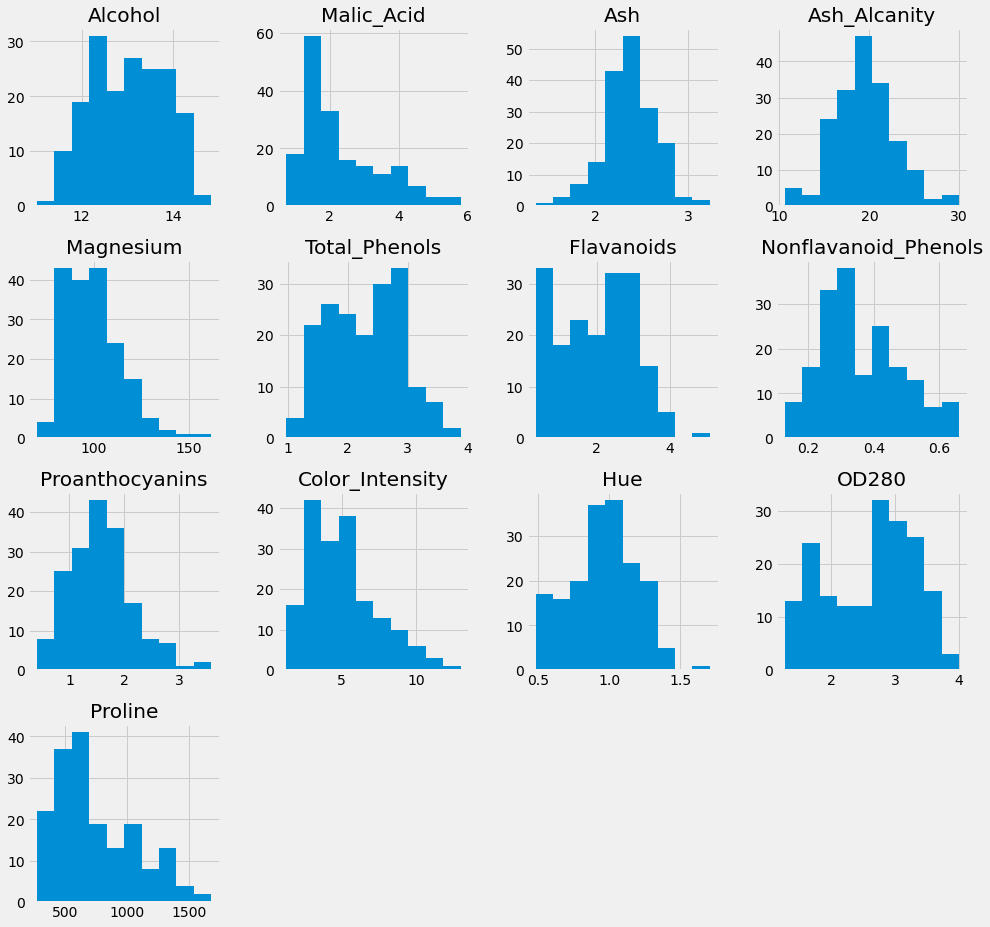

In [6]:
df.hist(figsize=(15,15))
plt.show()

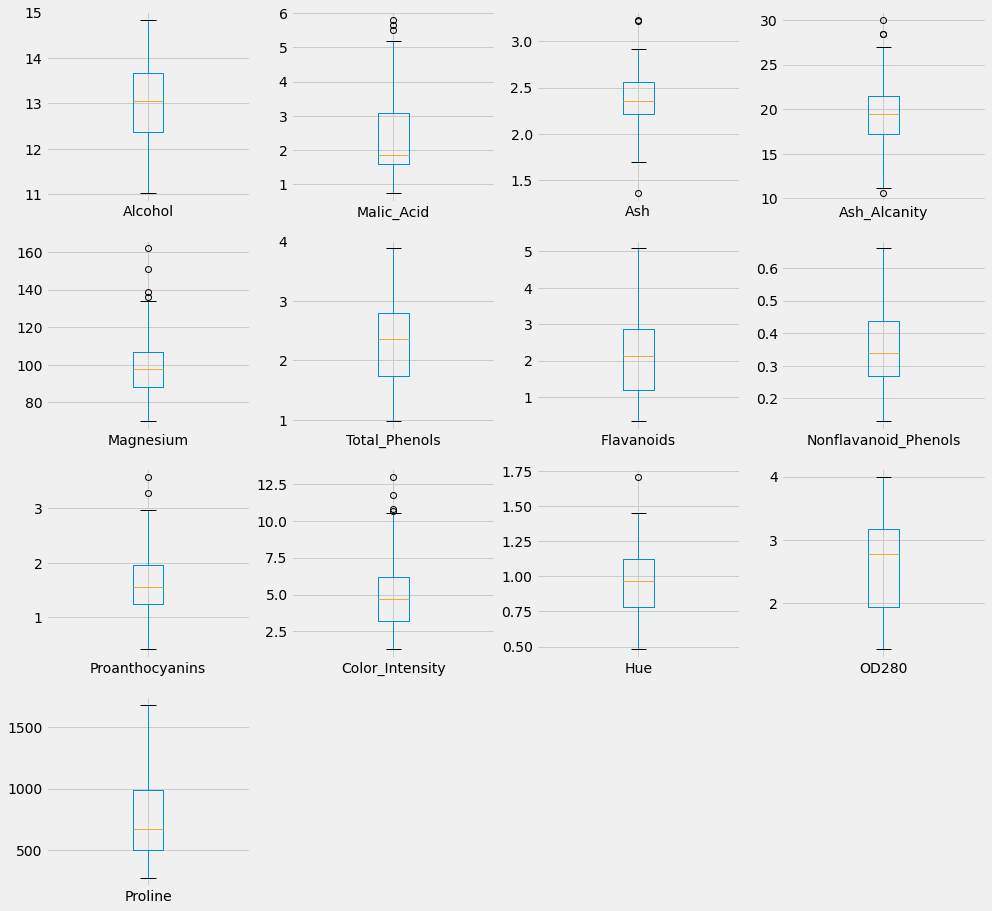

In [7]:
df.plot(kind="box", subplots = True,layout = (4,4),figsize=(15,15))
plt.show()

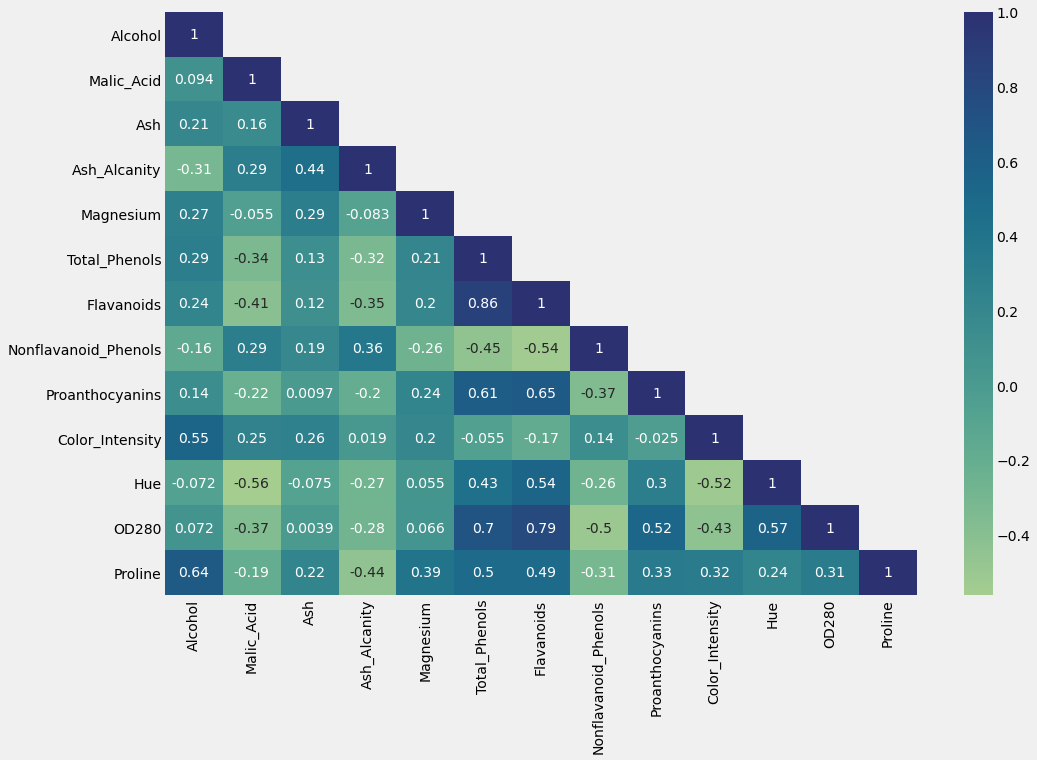

In [8]:
plt.figure(figsize=(15,10))
mask = np.triu(df.corr(),1)
sns.heatmap(df.corr(), annot=True,mask=mask, cmap="crest")
plt.show()

# Preprocessing

In [9]:
#Sum of Null Values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [10]:
#Sum of Duplicated Value
df.duplicated().sum()

0

In [11]:
#Outlier Detection
print("Before outlier Detection:",df.shape)

for col in df.columns:
    q1, q3 = df[col].quantile([0.25,0.75])
    IQR = q3-q1
    
    max_val = q3 + 1.5*IQR
    min_val = q1 - 1.5*IQR
    
    outliers = df[(df[col]>max_val) | (df[col]<min_val)].index
    
    df.drop(outliers, axis=0, inplace=True)

print("After outlier Detection:", df.shape)

Before outlier Detection: (178, 13)
After outlier Detection: (161, 13)


- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
- If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
- If the skewness is less than -1 or greater than 1, the data are highly skewed

we don't need any skewness process 

In [12]:
#Skewness
df.skew().sort_values(ascending=False)

Malic_Acid              0.863270
Proline                 0.692518
Color_Intensity         0.668651
Nonflavanoid_Phenols    0.499223
Magnesium               0.486670
Proanthocyanins         0.277080
Total_Phenols           0.100116
Ash_Alcanity            0.068000
Alcohol                -0.040271
Flavanoids             -0.117912
Hue                    -0.121298
Ash                    -0.224981
OD280                  -0.337940
dtype: float64

In [13]:
#Scaling
columns = df.columns
scaler = StandardScaler()

data = scaler.fit_transform(df)

df = pd.DataFrame(data=data, columns=columns)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.515163,-0.579166,0.270936,-1.248144,2.298023,0.828643,1.055948,-0.650569,1.466583,0.282097,0.383333,1.828097,0.982174
1,0.209648,-0.512507,-0.931537,-2.732175,0.114047,0.589411,0.749315,-0.815257,-0.505150,-0.304357,0.429479,1.096928,0.934830
2,0.158948,0.039806,1.266087,-0.236305,0.194935,0.828643,1.239928,-0.485881,2.481732,0.300715,0.337186,0.773526,1.360929
3,1.692612,-0.350622,0.561189,-0.843409,1.165591,2.503264,1.495455,-0.979945,1.251840,1.287448,-0.447308,1.167233,2.292034
4,0.260347,0.258826,2.095379,0.573166,1.570031,0.828643,0.677767,0.255215,0.549044,-0.332284,0.383333,0.436064,-0.059401


# Modelling

In [14]:
#PCA
pca = PCA(n_components=2)

pca_2 = pca.fit_transform(data)

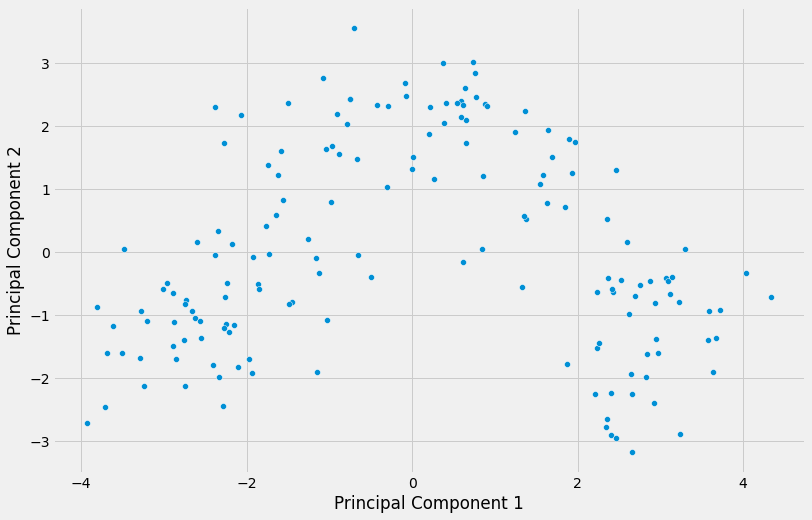

In [15]:
#13 Dimensions to 2 dimensions
plt.figure(figsize=(12,8))
sns.scatterplot(x=pca_2[:,0], y=pca_2[:,1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## K-Means

**Inertia** measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph.

**silhouette score** is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [16]:
# K-Means Inertia and Silhouette score
inertia = list()
silhouette ={}

for i in range(2,10):
    k_means = KMeans(n_clusters=i)
    k_means.fit(data)
    
    inertia.append(k_means.inertia_)
    
    silhouette[i] = silhouette_score(df, labels=k_means.labels_ , metric="euclidean")

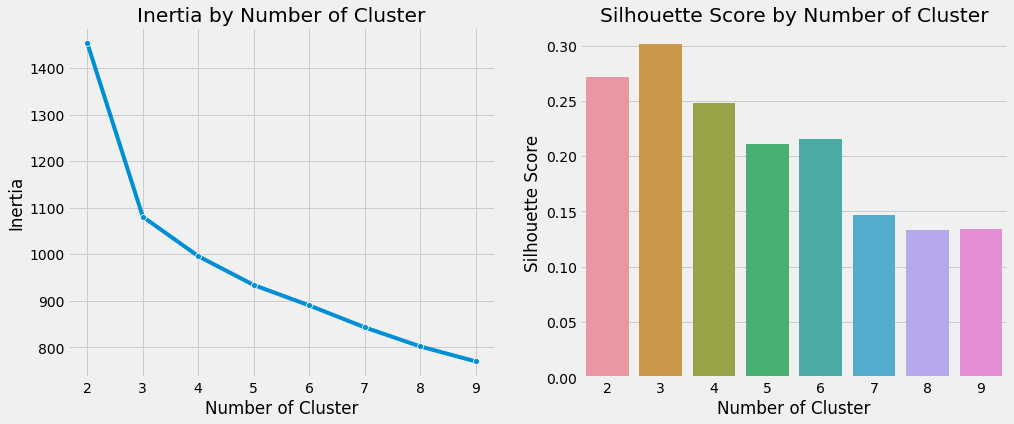

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

sns.lineplot(x=range(2,10), y=inertia, marker="o", ax=ax[0])
ax[0].set_xlabel("Number of Cluster")
ax[0].set_ylabel("Inertia")
ax[0].set_title("Inertia by Number of Cluster")

sns.barplot(x=list(silhouette.keys()), y=list(silhouette.values()), ax=ax[1])
ax[1].set_title("Silhouette Score by Number of Cluster")
ax[1].set_xlabel("Number of Cluster")
ax[1].set_ylabel("Silhouette Score")
plt.show()

**in K=3 all the metrics indicates that it is the best clusters number**

In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

kmeans_labels = kmeans.predict(data)
centers = kmeans.cluster_centers_

In [19]:
pca = PCA(n_components=2)
centers = pca.fit_transform(centers)

centers

array([[ 2.71436363, -0.84532153],
       [-2.47363202, -1.11872685],
       [-0.24073161,  1.96404839]])

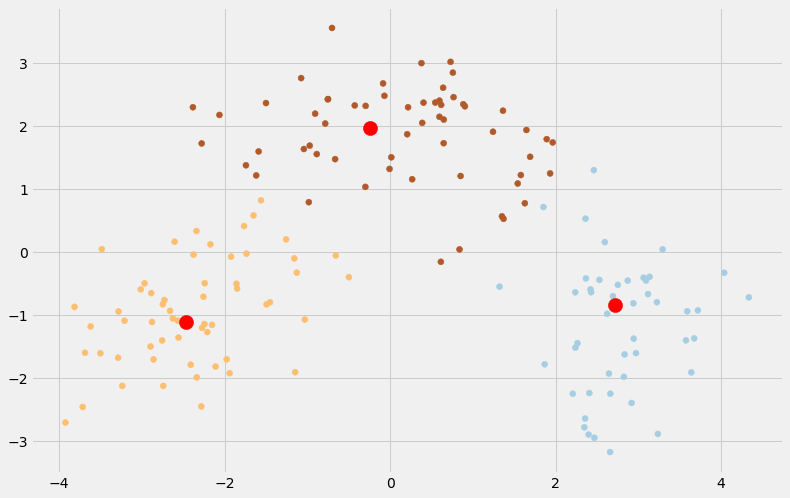

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(pca_2[:,0],pca_2[:,1], c=kmeans_labels, cmap="Paired")
plt.scatter(centers[:,0],centers[:, 1], c="red", s=200)
plt.show()